In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import the data
df=pd.read_csv("datasets/cleandf.csv")

In [3]:
df=df.drop(columns="Unnamed: 0")

In [4]:
pd.set_option('display.max_columns', None)

## RANDOM FOREST CLASSIFIER WITH FEATURE SELECTION

Purpose: to predict whether a flight is recommended or not (avoiding multicollinearity) and do a feature selection to check which variables are more important in the model

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90008 entries, 0 to 90007
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AIRLINENAME          90008 non-null  object
 1   CABINTYPE            90008 non-null  int64 
 2   DATEFLOWN            90008 non-null  object
 3   DATEPUB              90008 non-null  object
 4   ENTERTAINMENTRATING  90008 non-null  int64 
 5   FOODRATING           90008 non-null  int64 
 6   GROUNDSERVICERATING  90008 non-null  int64 
 7   ORIGINCOUNTRY        90008 non-null  object
 8   OVERALLSCORE         90008 non-null  int64 
 9   RECOMMENDED          90008 non-null  int64 
 10  REVIEW               90008 non-null  object
 11  ROUTE                90008 non-null  object
 12  ORIGIN               90008 non-null  object
 13  DESTINY              89996 non-null  object
 14  SCALE_YN             90008 non-null  int64 
 15  SEATCOMFORTRATING    90008 non-null  int64 
 16  SERV

In [8]:
#Replace countries not well written

In [9]:
df["ORIGINCOUNTRY"].replace("UnitedStates","United States", inplace=True)
df["ORIGINCOUNTRY"].replace("UnitedKingdom","United Kingdom", inplace=True)
df["ORIGINCOUNTRY"].replace("CzechRepublic","Czech Republic", inplace=True)
df["ORIGINCOUNTRY"].replace("RussianFederation","Russian Federation", inplace=True)
df["ORIGINCOUNTRY"].replace("UnitedArabEmirates","United Arab Emirates", inplace=True)
df["ORIGINCOUNTRY"].replace("NetherlandsAntilles","Netherlands Antilles", inplace=True)
df["ORIGINCOUNTRY"].replace("SouthAfrica","South Africa", inplace=True)
df["ORIGINCOUNTRY"].replace("SaudiArabia","Saudi Arabia", inplace=True)
df["ORIGINCOUNTRY"].replace("HongKong","China", inplace=True)
df["ORIGINCOUNTRY"].replace("NewZealand","New Zealand", inplace=True)
df["ORIGINCOUNTRY"].replace("SouthKorea","South Korea", inplace=True)
df["ORIGINCOUNTRY"].replace("CostaRica","Costa Rica", inplace=True)
df["ORIGINCOUNTRY"].replace("AntiguaandBarbuda","Antigua and Barbuda", inplace=True)
df["ORIGINCOUNTRY"].replace("TurksandCaicosIslands","Turks and Caicos Islands", inplace=True)
df["ORIGINCOUNTRY"].replace("SriLanka","Sri Lanka", inplace=True)
df["ORIGINCOUNTRY"].replace("CaymanIslands","Cayman Islands", inplace=True)
df["ORIGINCOUNTRY"].replace("PuertoRico","Puerto Rico", inplace=True)
df["ORIGINCOUNTRY"].replace("ElSalvador","El Salvador", inplace=True)

In [10]:
#create a new variable: continent from origin country

In [11]:
from functions import continent as cont

In [12]:
df['CONTINENT'] = df['ORIGINCOUNTRY'].apply(lambda x: cont(x))

In [13]:
df.CONTINENT.value_counts()

CONTINENT
America    40253
Europe     26370
Asia       13075
Oceania     7757
Africa      1307
Other       1246
Name: count, dtype: int64

In [14]:
df.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,LONGDISTANCE,YEAR,CONTINENT
2601,Air China,1,2017-11-01,3rd December 2017,3,2,2,United States,7,1,Bangkok to Washington-Dulles via Beijing. For ...,Bangkok to Washington-Dulles via Beijing,Bangkok,Washington-Dulles,1,3,3,air-china,worth a shout if you get a cheap ticket,1,1,1,5,0,ee02a6d1-506e-4ba0-a310-c5b611f1e4f0,1,2017,America


In [15]:
#save the data with the new variable
cleancontinents=df.to_excel("datasets/clean_continent.xlsx")

In [16]:
categorical=df["CONTINENT"]
categorical=pd.DataFrame(categorical)
numerical=df[["CABINTYPE","TRAVELLER", "PURPOSE", "RECOMMENDED","FOODRATING", "GROUNDSERVICERATING", "SERVICERATING","TRIPVERIFIED", "SCALE_YN", "LONGDISTANCE", "SEATCOMFORTRATING"]]
#OVERALL not included as it is too related to whether it is recommended or not a flight. Same with VALUERATING

In [17]:
encoder = OneHotEncoder(drop='first').fit(categorical) #it will take out Africa, which is not a big category --> ok
encoded_categorical = encoder.transform(categorical).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

In [18]:
data = pd.concat([numerical, encoded_categorical], axis = 1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90008 entries, 0 to 90007
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CABINTYPE            90008 non-null  int64  
 1   TRAVELLER            90008 non-null  int64  
 2   PURPOSE              90008 non-null  int64  
 3   RECOMMENDED          90008 non-null  int64  
 4   FOODRATING           90008 non-null  int64  
 5   GROUNDSERVICERATING  90008 non-null  int64  
 6   SERVICERATING        90008 non-null  int64  
 7   TRIPVERIFIED         90008 non-null  int64  
 8   SCALE_YN             90008 non-null  int64  
 9   LONGDISTANCE         90008 non-null  int64  
 10  SEATCOMFORTRATING    90008 non-null  int64  
 11  CONTINENT_America    90008 non-null  float64
 12  CONTINENT_Asia       90008 non-null  float64
 13  CONTINENT_Europe     90008 non-null  float64
 14  CONTINENT_Oceania    90008 non-null  float64
 15  CONTINENT_Other      90008 non-null 

In [20]:
data

,CABINTYPE,TRAVELLER,PURPOSE,RECOMMENDED,FOODRATING,GROUNDSERVICERATING,SERVICERATING,TRIPVERIFIED,SCALE_YN,LONGDISTANCE,SEATCOMFORTRATING,CONTINENT_America,CONTINENT_Asia,CONTINENT_Europe,CONTINENT_Oceania,CONTINENT_Other
0,1,1,1,1,4,4,5,1,0,0,4,0.0,0.0,1.0,0.0,0.0
1,1,1,1,0,1,1,2,1,0,0,2,0.0,0.0,1.0,0.0,0.0
2,1,1,1,0,1,1,1,1,0,0,2,0.0,0.0,1.0,0.0,0.0
3,1,1,0,0,1,1,3,1,0,0,1,0.0,0.0,1.0,0.0,0.0
4,1,1,1,1,0,5,4,1,0,0,4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90003,1,1,1,1,0,2,1,0,0,0,1,0.0,0.0,1.0,0.0,0.0
90004,1,3,1,0,1,1,2,0,0,1,1,1.0,0.0,0.0,0.0,0.0
90005,1,1,1,0,0,2,1,0,0,0,2,0.0,0.0,1.0,0.0,0.0
90006,1,2,1,0,0,1,2,0,0,0,2,1.0,0.0,0.0,0.0,0.0


In [21]:
y = numerical['RECOMMENDED']
X = numerical.drop(columns=['RECOMMENDED'])

In [22]:
X

,CABINTYPE,TRAVELLER,PURPOSE,FOODRATING,GROUNDSERVICERATING,SERVICERATING,TRIPVERIFIED,SCALE_YN,LONGDISTANCE,SEATCOMFORTRATING
0,1,1,1,4,4,5,1,0,0,4
1,1,1,1,1,1,2,1,0,0,2
2,1,1,1,1,1,1,1,0,0,2
3,1,1,0,1,1,3,1,0,0,1
4,1,1,1,0,5,4,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...
90003,1,1,1,0,2,1,0,0,0,1
90004,1,3,1,1,1,2,0,0,1,1
90005,1,1,1,0,2,1,0,0,0,2
90006,1,2,1,0,1,2,0,0,0,2


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [24]:
#HP tuning to find the best ones:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150], #number of trees.
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt','log2']

    }
clf = RandomForestClassifier(random_state=100)

In [25]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1) 

In [26]:
X_train.columns = X_train.columns.astype(str)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True)

In [27]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [28]:
#perform the cross validation to check if ok
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=42, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=2, n_estimators=50)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=7)
print(np.mean(cross_val_scores))
#ok

0.931214118953691


In [29]:
clf.fit( X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, n_estimators=50, random_state=42)

In [30]:
X_train.head()

,CABINTYPE,TRAVELLER,PURPOSE,FOODRATING,GROUNDSERVICERATING,SERVICERATING,TRIPVERIFIED,SCALE_YN,LONGDISTANCE,SEATCOMFORTRATING
10963,1,3,1,1,1,1,1,0,1,1
65100,1,1,0,3,4,5,0,0,1,4
19065,1,1,0,1,2,3,1,0,0,1
4293,3,2,1,3,3,3,1,0,1,1
76428,3,1,1,4,4,4,1,1,1,5


In [31]:
#check the feature importance: which variables explain more the dependent variable?
def importancia (model, X_train):
    import pandas as pd
    feature_names = X_train.columns
    feature_names = list(feature_names)
    featimp = pd.DataFrame(list(zip(feature_names, model.feature_importances_)))
    featimp.columns = ['columns_name', 'score_feature_importance']
    df_importante=featimp[featimp.score_feature_importance>0]
    return df_importante.sort_values(by=['score_feature_importance'], ascending = False)


In [32]:
#X_train.columns = X_train.columns 

In [33]:
importancia (clf,X_train)

,columns_name,score_feature_importance
4,GROUNDSERVICERATING,0.357733
5,SERVICERATING,0.248020
9,SEATCOMFORTRATING,0.187183
3,FOODRATING,0.148854
0,CABINTYPE,0.013734
1,TRAVELLER,0.013206
8,LONGDISTANCE,0.008932
6,TRIPVERIFIED,0.008894
7,SCALE_YN,0.007831
2,PURPOSE,0.005613


[Text(0.5, 0, 'VARS'),
 Text(0, 0.5, 'FEAT.IMPORTANCE'),
 Text(0.5, 1.0, 'VAR. LEVEL OF IMPORTANCE TO PREDICT TRIP RECOMMENDATION')]

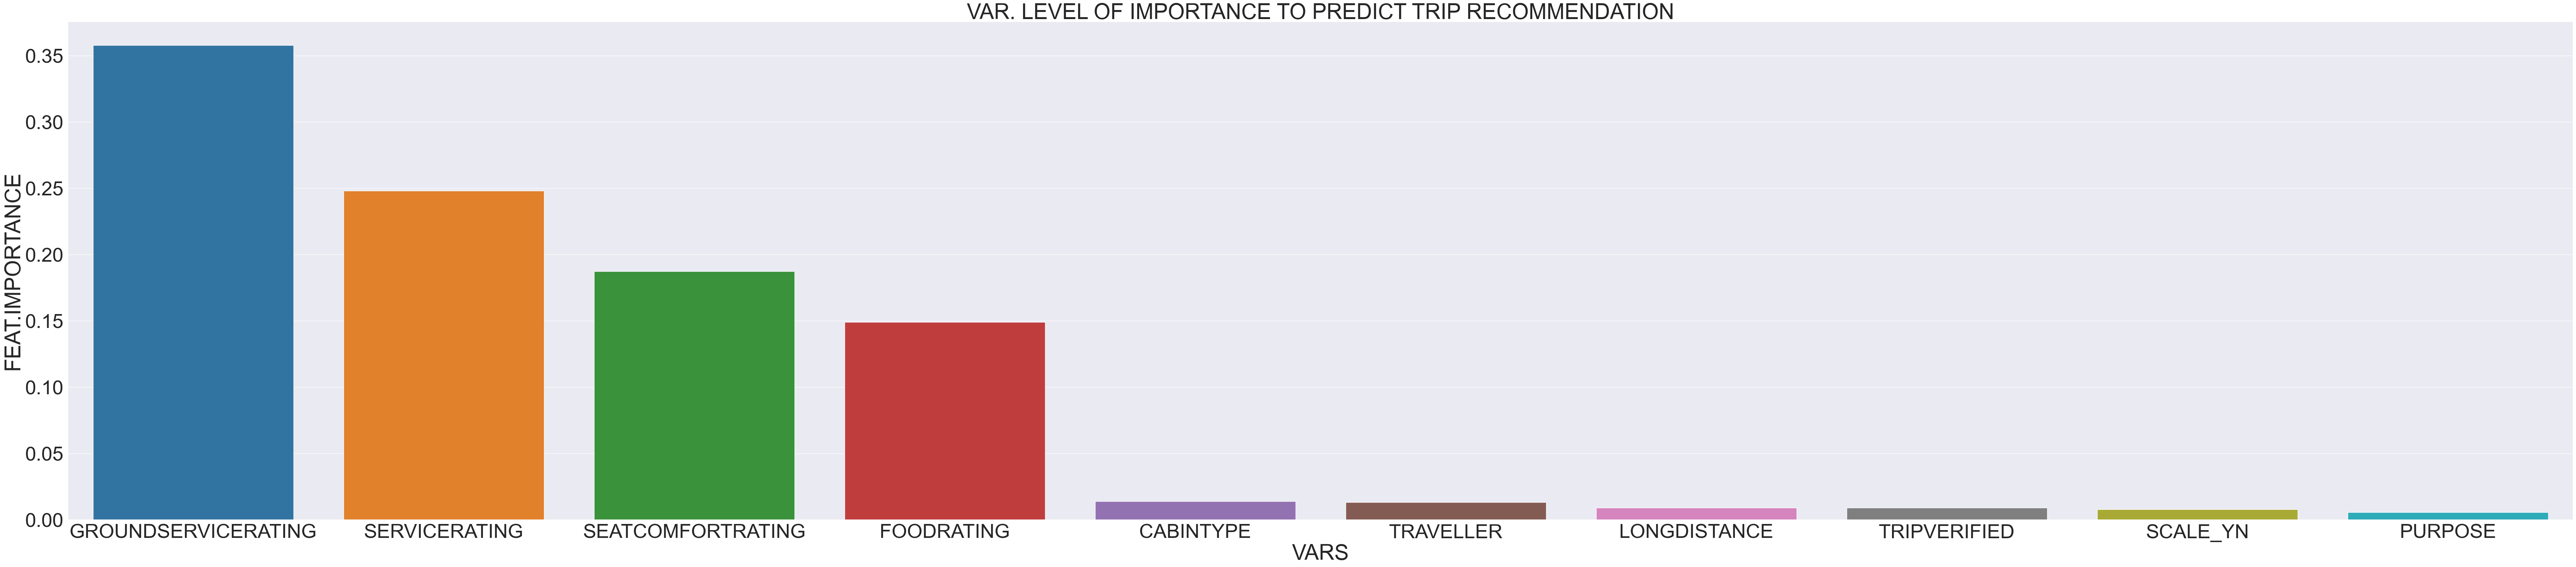

In [36]:
#Feature Importance Graphically

feature_names = X_train.columns
feature_names = list(feature_names)

df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']

grapfh_featimp=df[df.score_feature_importance>0.005].sort_values(by=['score_feature_importance'], ascending = False)
a=sns.barplot(grapfh_featimp, x="columns_name", y="score_feature_importance", palette="tab10")
sns.set(rc = {'figure.figsize':(100,20)})

sns.set(font_scale=4)

a.set(xlabel ="VARS", ylabel = "FEAT.IMPORTANCE", title ='VAR. LEVEL OF IMPORTANCE TO PREDICT TRIP RECOMMENDATION')


In [35]:
#ratings are the ones explaining more the fact that a review is recommended or not. Ground staff service, specially!
#overall score and value for money not included as they are too much related to the recommendation.